<a href="https://colab.research.google.com/github/weslleson22/1a-Avalia-o---Teoria-dos-Grafos---Projeto/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import tensorflow as tf
import pandas as pd
import altair as alt
import warnings
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Binarizer
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.backend import eval
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
from sklearn import metrics
from tensorflow import keras
from tensorflow.keras.layers import Dropout

In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

FileNotFoundError: ignored

In [ ]:
X = df[['Pregnancies',	'Glucose','BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']]
Y = df['Outcome']
Y = keras.utils.to_categorical(Y, 2)
print(Y)


[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle = True, test_size=0.2)
#normalização dos dados
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [5]:
print(f"Dados de treinamento: {X_train.shape}")
print(f"Dados de teste: {X_test.shape}")
print(f"Label de treinamento: {Y_train.shape}")
print(f"Label de teste: {Y_test.shape}")

NameError: ignored

In [ ]:
def neural(X):
    
	model = Sequential()

	model.add(Dense(100, input_dim=X.shape[1], activation='relu'))
 	
	model.add(Dropout(0.5))
 
	model.add(Dense(25, activation='relu'))
 	
	model.add(Dropout(0.5))
	 
	model.add(Dense(2, activation='sigmoid'))
	
	return model
    
model = neural(X_train)

adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])

history = model.fit(X_train, Y_train, shuffle = True, epochs=1000, batch_size=128, validation_split=0.2)

In [6]:
score = model.evaluate(X_test, Y_test)
prediction = model.predict(X_test)
#############
binarizer = Binarizer(threshold=0.50).fit(prediction)
binary = binarizer.transform(prediction)
############# 
y_test = Y_test
y_pred = binary

model.summary()

NameError: ignored

Accuracy using Back Propagation:  [0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.5708181262016296, 0.7077922224998474, 0.570

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


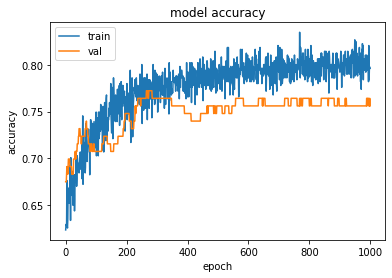

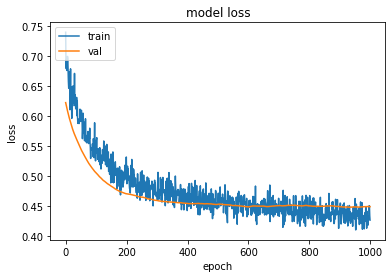

In [ ]:
print('Accuracy using Back Propagation: ', score*100, '%')
print("classification_report = ")
print(classification_report(y_test,y_pred))
print('learning rate: =')
print(eval(model.optimizer.lr))

from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)